### This Notebook is to predict a Incident Severity Score from the combination of Attack Duration and Vulnerability Score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# ------------------------------------------------------
# 1. Generate synthetic dataset
# ------------------------------------------------------
np.random.seed(42)
n_samples = 100

# Features
attack_duration = np.random.uniform(0.5, 10, n_samples)        # Duration of attack in hours
vulnerability_score = np.random.uniform(0, 1, n_samples)      # System vulnerability score [0-1]

# Target variable: severity score (continuous)
severity = 2 * attack_duration + 10 * vulnerability_score + np.random.normal(0, 2, n_samples)

# Create DataFrame
data = pd.DataFrame({
    "attack_duration": attack_duration,
    "vulnerability_score": vulnerability_score,
    "severity": severity
})

In [4]:
# Explain the data structure
print("DataFrame structure:\n", data.head(), "\n")
print("Feature descriptions:")
print("- attack_duration: Duration of the security breach in hours.")
print("- vulnerability_score: A normalized score [0-1] indicating system weakness.")
print("- severity: Computed severity score for breach (continuous).\n")

print("Summary statistics:\n", data.describe(), "\n")

DataFrame structure:
    attack_duration  vulnerability_score   severity
0         4.058131             0.031429   7.070505
1         9.531786             0.636410  25.892183
2         7.453942             0.314356  18.637590
3         6.187256             0.508571  16.031515
4         1.982177             0.907566  16.771568 

Feature descriptions:
- attack_duration: Duration of the security breach in hours.
- vulnerability_score: A normalized score [0-1] indicating system weakness.
- severity: Computed severity score for breach (continuous).

Summary statistics:
        attack_duration  vulnerability_score    severity
count       100.000000           100.000000  100.000000
mean          4.966717             0.497832   15.127818
std           2.826149             0.293111    6.596209
min           0.552460             0.006952    1.716044
25%           2.335407             0.242005   10.398395
50%           4.909353             0.505625   14.382929
75%           7.436930             0

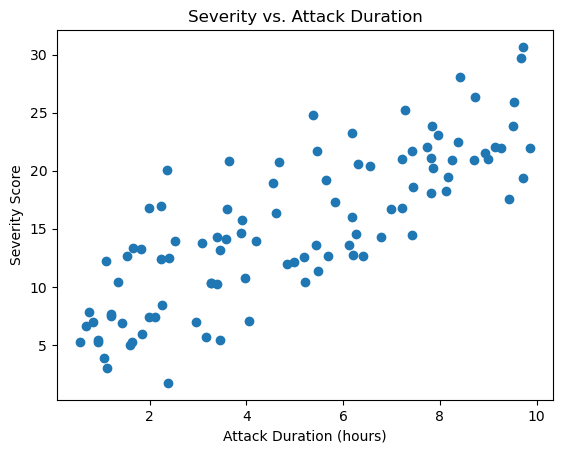

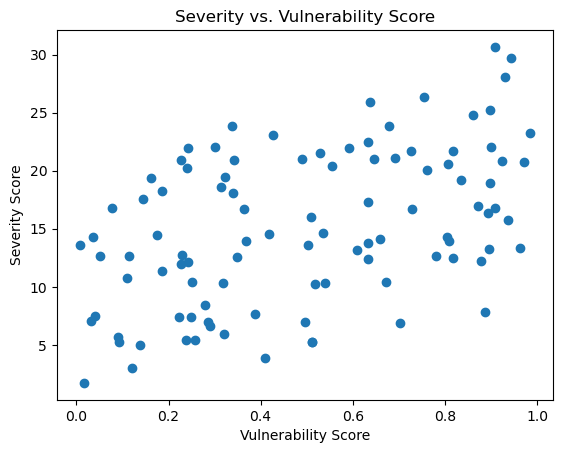

In [5]:
# ------------------------------------------------------
# 2. Visualize relationships
# ------------------------------------------------------
plt.figure()
plt.scatter(data["attack_duration"], data["severity"])
plt.xlabel("Attack Duration (hours)")
plt.ylabel("Severity Score")
plt.title("Severity vs. Attack Duration")
plt.show()

plt.figure()
plt.scatter(data["vulnerability_score"], data["severity"])
plt.xlabel("Vulnerability Score")
plt.ylabel("Severity Score")
plt.title("Severity vs. Vulnerability Score")
plt.show()

In [6]:
# ------------------------------------------------------
# 3. Train-test split
# ------------------------------------------------------
X = data[["attack_duration", "vulnerability_score"]]
y = data["severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0], "\n")

Number of training samples: 80
Number of testing samples: 20 



In [7]:
# ------------------------------------------------------
# 4. Fit Linear Regression model
# ------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Print model details
print("Model intercept (b0):", model.intercept_)
print("Model coefficients [attack_duration, vulnerability_score]:", model.coef_, "\n")


Model intercept (b0): -0.3871715573049599
Model coefficients [attack_duration, vulnerability_score]: [ 1.94737307 11.57434749] 



In [8]:
# ------------------------------------------------------
# 5. Model evaluation
# ------------------------------------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test RMSE:", np.sqrt(mse))
print("Test R^2 score:", r2, "\n")

# Show first few predictions vs actual
comparison = pd.DataFrame({
    "attack_duration": X_test["attack_duration"],
    "vulnerability_score": X_test["vulnerability_score"],
    "actual_severity": y_test,
    "predicted_severity": y_pred
}).reset_index(drop=True)

print("Actual vs. Predicted severity (first 5 rows):\n", comparison.head(), "\n")


Test MSE: 2.665728395460755
Test RMSE: 1.63270585086866
Test R^2 score: 0.9433966830637076 

Actual vs. Predicted severity (first 5 rows):
    attack_duration  vulnerability_score  actual_severity  predicted_severity
0         1.103804             0.877339        12.248840           11.916978
1         9.000860             0.489453        21.020597           22.805957
2         7.836325             0.677564        23.820815           22.715443
3         6.793962             0.036887        14.264243           13.270149
4         2.958410             0.284840         6.997510            8.670799 



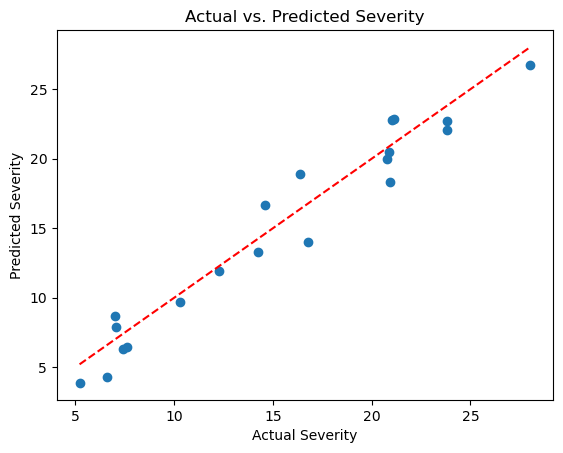

In [12]:
# ------------------------------------------------------
# 6. Plot predictions vs actual
# ------------------------------------------------------
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity")
plt.show()


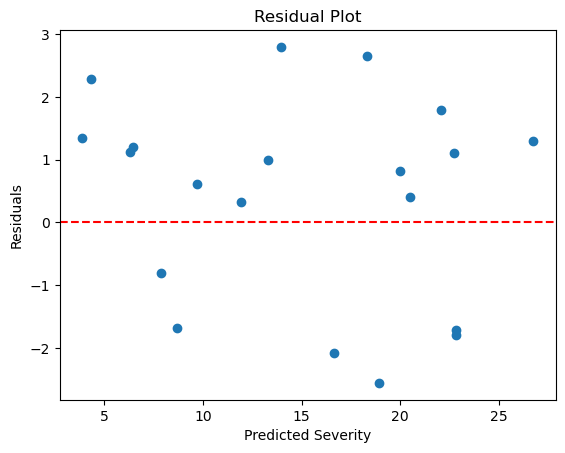

In [18]:
# ------------------------------------------------------
# 7. Residual plot
# ------------------------------------------------------
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Severity")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()